In [77]:
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv('/kaggle/input/hp-twitter-sentiment-analysis-hp-pc-hp-printer/final_tweet.csv')

In [79]:
df.head()

,Unnamed: 0,Tweet,Processed_Tweets,Polarity,Sentiment
0,0,경주리모델링 \nhttps://t.co/SBZlOWDzhI,경주리모델,0.0,Neutral
1,1,計算時間が短かいから多人数で使えないと\n稼働率が低くなるのだろうなぁ。\n\nビット組合わ...,計算時間が短かいから多人数で使えないと稼働率が低くなるのだろうなぁ。ビット組合わせを一度に計...,0.0,Neutral
2,2,@scubaboybop1110 STYLYさんのHPを参考に、iPhoneの動画を3DF ...,stylyさんのhpを参考に、iphoneの動画をdfzephyrというpcソフトで処理して...,0.0,Neutral
3,3,fyi jg aku cuma pake data internet (tsel) dan ...,fyijgakucumapakedatainternettseldancumapakeapp...,0.0,Neutral
4,4,ノートPCのキーボードとタッチパッドが壊れて使えなくなったので、VAIOからHPへ買い換えま...,ノートpcのキーボードとタッチパッドが壊れて使えなくなったので、vaioからhpへ買い換えま...,0.0,Neutral


In [80]:
df1 = df['Tweet']

In [81]:
df1.head()

0                     경주리모델링 \nhttps://t.co/SBZlOWDzhI
1    計算時間が短かいから多人数で使えないと\n稼働率が低くなるのだろうなぁ。\n\nビット組合わ...
2    @scubaboybop1110 STYLYさんのHPを参考に、iPhoneの動画を3DF ...
3    fyi jg aku cuma pake data internet (tsel) dan ...
4    ノートPCのキーボードとタッチパッドが壊れて使えなくなったので、VAIOからHPへ買い換えま...
Name: Tweet, dtype: object

In [82]:
df1.tail()

824    @RawAlok Hey Alok, \nWelcome to HP Support! \n...
825    @HPIndia hp 1005 printer,cuttack ,odisha ,yest...
826    256MB Printer Memory for HP Laserjet Pro 400 C...
827    https://t.co/5HWhYyjUxb ink cartridge,ink cart...
828    Thanks @HP for the printer that came with a ne...
Name: Tweet, dtype: object

In [83]:
from langdetect import detect

english_sentences = []
non_english_sentences = []

for sentence in df1:
    try:
        if detect(sentence) == 'en':
            english_sentences.append(sentence)
        else:
            non_english_sentences.append(sentence)
    except:
        non_english_sentences.append(sentence)


In [84]:
df2 = pd.DataFrame(english_sentences)

In [85]:
df2.head()

,0
0,BMW M3 xDrive With 600 HP Delivers Furious Acc...
1,"A take-anywhere door lock, silicone spikes tha..."
2,How freaking hard is it to set up a new printe...
3,"Look at me, I'm an @HP printer and I refuse to..."
4,@FS_Yusuf_ 3. Airconditioner (1.5 hp).\n\n4. 2...


In [86]:
df2.columns = ['Tweet']

In [87]:
# Import necessary libraries
import pandas as pd
import re
from textblob import TextBlob

# Function to clean the tweets
def clean_tweet(tweet):
    # Remove mentions and URLs
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'https?://[A-Za-z0-9./]+', '', tweet)
    # Remove special characters and digits
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tweet = re.sub(r'\d+', '', tweet)
    # Convert to lowercase
    tweet = tweet.lower()
    return tweet

# Apply the cleaning function to the "text" column
df2['clean_text'] = df2['Tweet'].apply(clean_tweet)

# Function to perform sentiment analysis
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity, analysis.sentiment.subjectivity

# Apply the sentiment analysis function to the "clean_text" column
df2['sentiment_polarity'], df2['sentiment_subjectivity'] = zip(*df2['clean_text'].apply(get_sentiment))

# Display the results
print(df2[['Tweet', 'sentiment_polarity', 'sentiment_subjectivity']])



                                                 Tweet  sentiment_polarity  \
0    BMW M3 xDrive With 600 HP Delivers Furious Acc...            0.000000   
1    A take-anywhere door lock, silicone spikes tha...            0.366667   
2    How freaking hard is it to set up a new printe...           -0.124394   
3    Look at me, I'm an @HP printer and I refuse to...           -0.100000   
4    @FS_Yusuf_ 3. Airconditioner (1.5 hp).\n\n4. 2...            0.000000   
..                                                 ...                 ...   
690  @RawAlok Hey Alok, \nWelcome to HP Support! \n...            0.129861   
691  @HPIndia hp 1005 printer,cuttack ,odisha ,yest...            0.000000   
692  256MB Printer Memory for HP Laserjet Pro 400 C...            0.000000   
693  https://t.co/5HWhYyjUxb ink cartridge,ink cart...            0.000000   
694  Thanks @HP for the printer that came with a ne...           -0.160000   

     sentiment_subjectivity  
0                  0.000000  
1  

In [88]:
df2.head()

,Tweet,clean_text,sentiment_polarity,sentiment_subjectivity
0,BMW M3 xDrive With 600 HP Delivers Furious Acc...,bmw m xdrive with hp delivers furious acceler...,0.000000,0.000000
1,"A take-anywhere door lock, silicone spikes tha...",a takeanywhere door lock silicone spikes that ...,0.366667,0.700000
2,How freaking hard is it to set up a new printe...,how freaking hard is it to set up a new printe...,-0.124394,0.577121
3,"Look at me, I'm an @HP printer and I refuse to...",look at me im an printer and i refuse to prin...,-0.100000,0.300000
4,@FS_Yusuf_ 3. Airconditioner (1.5 hp).\n\n4. 2...,airconditioner hp\n\n allinone computer an...,0.000000,0.000000


In [89]:
# Define a function to map polarity values to sentiment labels
def get_sentiment_label(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply the sentiment analysis function to the "clean_text" column
df2['sentiment_polarity'], df2['sentiment_subjectivity'] = zip(*df2['clean_text'].apply(get_sentiment))

# Map polarity values to sentiment labels
df2['sentiment'] = df2['sentiment_polarity'].apply(get_sentiment_label)

# Display the results
print(df2.head())


                                               Tweet  \
0  BMW M3 xDrive With 600 HP Delivers Furious Acc...   
1  A take-anywhere door lock, silicone spikes tha...   
2  How freaking hard is it to set up a new printe...   
3  Look at me, I'm an @HP printer and I refuse to...   
4  @FS_Yusuf_ 3. Airconditioner (1.5 hp).\n\n4. 2...   

                                          clean_text  sentiment_polarity  \
0  bmw m xdrive with  hp delivers furious acceler...            0.000000   
1  a takeanywhere door lock silicone spikes that ...            0.366667   
2  how freaking hard is it to set up a new printe...           -0.124394   
3  look at me im an  printer and i refuse to prin...           -0.100000   
4    airconditioner  hp\n\n  allinone computer an...            0.000000   

   sentiment_subjectivity sentiment  
0                0.000000   neutral  
1                0.700000  positive  
2                0.577121  negative  
3                0.300000  negative  
4               

In [90]:
df2.head()

,Tweet,clean_text,sentiment_polarity,sentiment_subjectivity,sentiment
0,BMW M3 xDrive With 600 HP Delivers Furious Acc...,bmw m xdrive with hp delivers furious acceler...,0.000000,0.000000,neutral
1,"A take-anywhere door lock, silicone spikes tha...",a takeanywhere door lock silicone spikes that ...,0.366667,0.700000,positive
2,How freaking hard is it to set up a new printe...,how freaking hard is it to set up a new printe...,-0.124394,0.577121,negative
3,"Look at me, I'm an @HP printer and I refuse to...",look at me im an printer and i refuse to prin...,-0.100000,0.300000,negative
4,@FS_Yusuf_ 3. Airconditioner (1.5 hp).\n\n4. 2...,airconditioner hp\n\n allinone computer an...,0.000000,0.000000,neutral


In [96]:
df2['sentiment'].value_counts()

positive    317
neutral     218
negative    160
Name: sentiment, dtype: int64

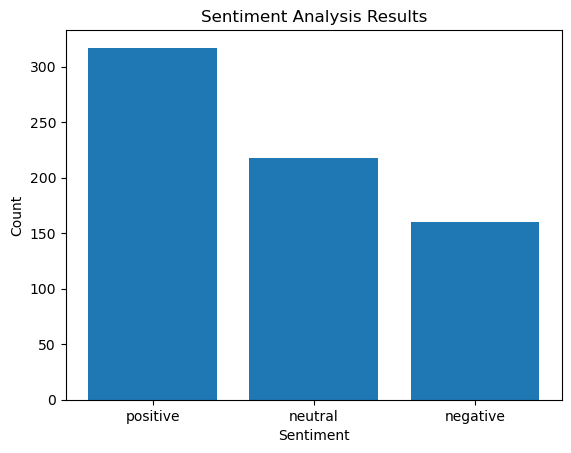

In [98]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral values in the "sentiment" column
sentiment_counts = df2['sentiment'].value_counts()

# Create a bar plot of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Set the plot title and axis labels
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()


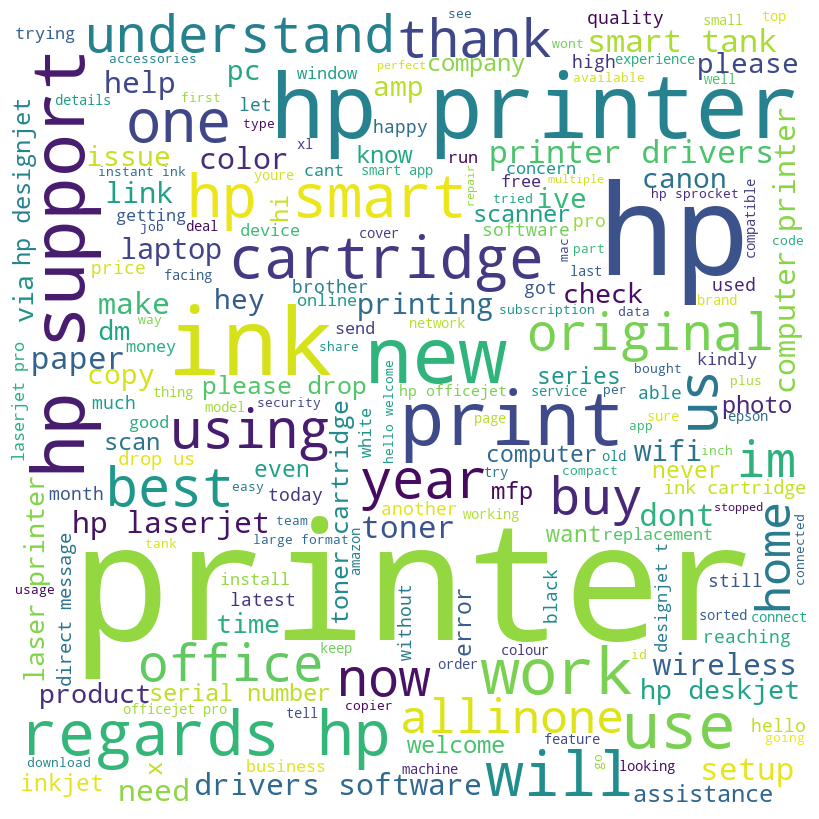

In [126]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the dataframe to include only positive sentiment tweets
positive_df = df2[df2['sentiment'] == 'positive']

# Concatenate all the tweet texts into a single string
positive_text = " ".join(positive_df['clean_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

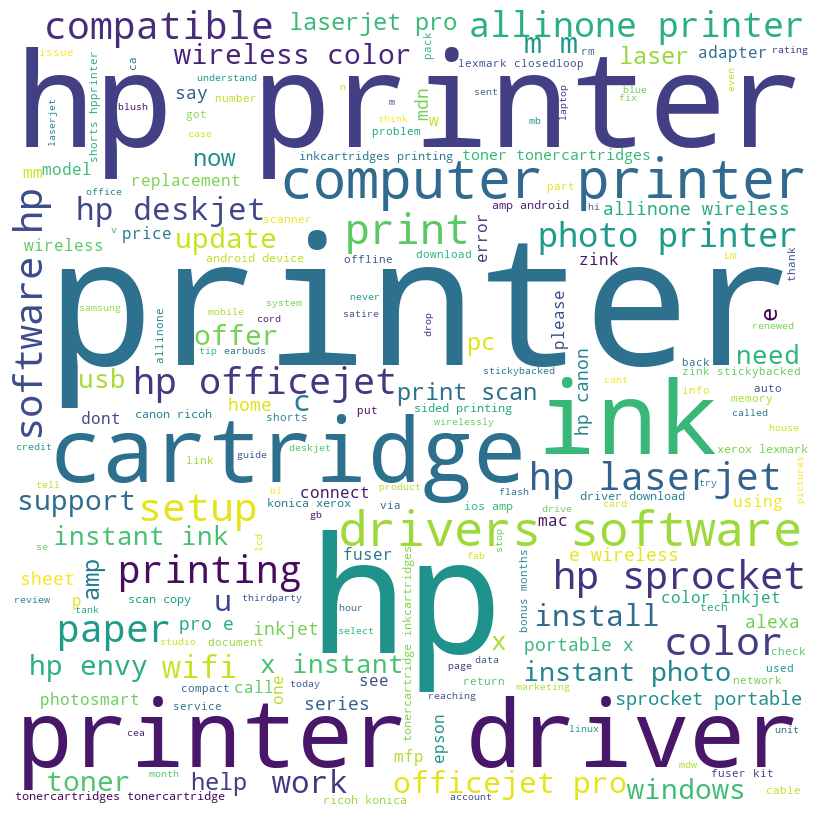

In [103]:
# Filter the dataframe to include only neutral sentiment tweets
neutral_df = df2[df2['sentiment'] == 'neutral']

# Concatenate all the tweet texts into a single string
neutral_text = " ".join(neutral_df['clean_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(neutral_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


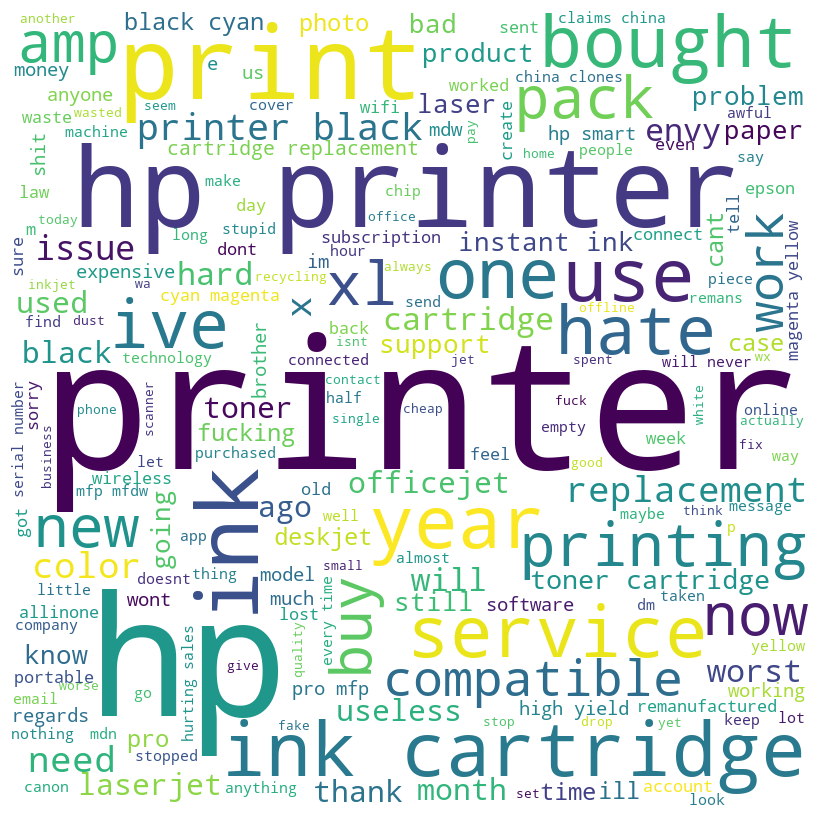

In [120]:
# Filter the dataframe to include only negative sentiment tweets
negative_df = df2[df2['sentiment'] == 'negative']

# Concatenate all the tweet texts into a single string
negative_text = " ".join(negative_df['clean_text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(negative_text)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


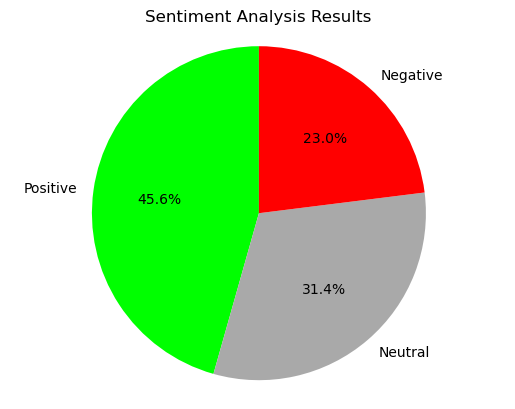

In [129]:
labels = ['Positive', 'Neutral', 'Negative']
sizes = [317, 218, 160]
colors = ['#00FF00', '#A9A9A9', '#FF0000']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Sentiment Analysis Results')

plt.show()
